# Pump failure data - Gibbs sampling

#### Josep Fortiana 2018-12-17

## Pump failure data

Robert, Casella (2010), _Introducing Monte Carlo Methods with R,_ Chapter 7, Example 7.12: Gibbs sampling in the Pump failure dataset.

A benchmark hierarchical example in the Gibbs sampling literature describes the number of failures and times of observation of ten pumps in a nuclear plant, with the data given in the following table:
	
$$
\begin{array}{l|cccccccccc}
	\hline
	\text{Pump}    &1		&2		&3		&4		&5		&6		&7		&8		&9		&10\\[0.2cm]
	\hline
	\text{Failures}&5		&1		&5		&14		&3		&19		&1		&1		&4		&22\\[0.2cm]
	\text{Time}	&94.32 	&15.72 	&62.88 	&125.76 &5.24 	&31.44 	&1.05 	&1.05 	&2.10 	&10.48\\[0.2cm]
	\hline
\end{array}
$$

Source: Gaver, D. P. & O'Muircheartaigh, I G. (1987). _Robust empirical Bayes analysis of event rates._ Technometrics 29, No. 1, pp. 1-15.

#### Data

In [2]:
x<-c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
t<-c(94.32, 15.72, 62.88, 125.76, 5.24, 31.44, 1.05, 1.05, 2.10, 10.48)
n<-length(x)

## Classical treatment

In [3]:
# Either each lambda.i is ML-estimated from a single observation as x.i/t.i
lambda.ML<-x/t
# or a common lambda is ML-estimated as the average of the above
mean.lambda.ML<-mean(lambda.ML)
round(lambda.ML,3)
round(mean.lambda.ML,3)

[1] 0.053 0.064 0.080 0.111 0.573 0.604 0.952 0.952 1.905 2.099

[1] 0.739

## Empirical Bayesian treatment

The modeling is based on the assumption that the number of failures of the $i$-th pump follows 
a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq 10)$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a Poisson 
$\operatorname{Poisson}(\lambda_{i}\cdot t_{i})$ random variable. 
The standard prior distributions are gamma distributions, which lead to the hierarchical model:

$$
    \begin{array}{cll}
        X_{i}      &\sim\operatorname{Poisson}(\lambda_{i}\cdot t_{i}), &i=1,\dots,10,\\
        \lambda_{i}&\sim\operatorname{Gamma}(\alpha,\beta),              &i=1,\dots,10,\\
    \end{array}
$$

The hyperparameters $\alpha$, $\beta$ are derived from the "observed" set of ML $\lambda$ estimates.

A Gamma distribution with parameters $\alpha$ and $\beta$ has expectation and variance:

$$
    \mu=\dfrac{\alpha}{\beta},\mskip30mu \sigma^2=\dfrac{\alpha}{\beta^2}.
$$

Given $\mu$ and $\sigma^2$, we obtain:

$$
    \alpha=\dfrac{\mu^{2}}{\sigma^{2}},\mskip30mu \beta=\dfrac{\mu^{2}}{\sigma^{2}}.
$$

In [4]:
var.lambda.ML<-var(lambda.ML)
round(var.lambda.ML,3)
alpha.hat<-(mean.lambda.ML)^2/var.lambda.ML
beta.hat<-mean.lambda.ML/var.lambda.ML
round(alpha.hat,3)
round(beta.hat,3)

[1] 0.567

[1] 0.964

[1] 1.304

Each $i$-th pump has a posterior pdf for $\lambda_{i}$, given its $t_{i}$ and the observed $x_{i}$.

$$
    \lambda_{i}\,|\,x_{i}\sim\operatorname{Gamma}(\widehat{\alpha}+x_{i},\widehat{\beta}+t_{i}).
$$

In [5]:
alpha.post<-alpha.hat+x
beta.post<-beta.hat+t
round(alpha.post,3)
round(beta.post,3)

[1]  5.964  1.964  5.964 14.964  3.964 19.964  1.964  1.964  4.964 22.964

[1]  95.624  17.024  64.184 127.064   6.544  32.744   2.354   2.354   3.404
[10]  11.784

#### Posterior expectations

In [6]:
lambda.post.mean<-alpha.post/beta.post
round(lambda.post.mean,3)

[1] 0.062 0.115 0.093 0.118 0.606 0.610 0.834 0.834 1.458 1.949

#### Posterior 90% credible intervals

In [8]:
round(rbind(qgamma(0.05,shape=alpha.post,rate=beta.post),qgamma(0.95,shape=alpha.post,rate=beta.post)),3)

0.027,0.020,0.040,0.073,0.206,0.404,0.145,0.145,0.572,1.331
0.109,0.275,0.163,0.172,1.177,0.850,1.990,1.990,2.674,2.662


#### Posterior MAP estimates

Using that the mode of a Gamma distribution is $(\alpha-1)/\beta$

In [9]:
lambda.post.MAP<-(alpha.post-1)/beta.post
round(lambda.post.MAP,3)

[1] 0.052 0.057 0.077 0.110 0.453 0.579 0.410 0.410 1.165 1.864

In [ ]:
round(rbind(lambda.ML,labda.post.MAP),1)

## Bayesian treatment

The modeling is based on the assumption that the number of failures of the $i$-th pump follows a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq 10)$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a Poisson $\operatorname{Poisson}(\lambda_{i}\cdot t_{i})$ random variable. The standard prior distributions are gamma distributions, which lead to the hierarchical model:
	
$$
    \begin{array}{cll}
	X_{i}		&\sim\operatorname{Poisson}(\lambda_{i}\cdot t_{i}), &i=1,\dots,10,\\
    \lambda_{i}&\sim\operatorname{Gamma}(\alpha,\beta),              &i=1,\dots,10,\\
	\beta		&\sim\operatorname{Gamma}(\gamma,\delta).
    \end{array}
$$

The hyperparameters $\alpha$, $\gamma$ and $\delta$ take constant values to be decided. Roberts and Casella use $\alpha=1.8$, $\gamma=0.01$ and $\delta=1.0$.

In the original paper where this data were first used, George and McCulloch (1993), they use a further prior:

$$
    \begin{array}{cll}
    \alpha &\sim\operatorname{Exp}(\omega),&\mskip120mu
    \end{array}
$$
	
with $\omega=1.0$ instead of a constant value.

One reason for collecting the pump failure data is to identify which pumps are more reliable.

a. Run the Gibbs sampler for the pump failure data and get 95% posterior credible intervals for the parameters.
 
b. Based on the analysis, can you identify any pumps that are more or less reliable than the others?

c. How does your answer in b change as the hyperparameter values are varied?

#### Likelihood

Notations: $n=10$, number of pumps, $x=(x_{1},\dots,x_{n})$ number of failures, $t=(t_{1},\dots,t_{n})$, observation times.

The likelihood is a product of Poisson pmf's:

$$
    f(x\,|\,\lambda)=\displaystyle\prod_{i=1}^{n} e^{-\lambda_{i}\cdot t_{i}}\cdot 
    \dfrac{(\lambda_{i}\cdot t_{i})^{x_{i}}}{x_{i}!}
    \propto \displaystyle\prod_{i=1}^{n} e^{-\lambda_{i}\cdot t_{i}}\cdot 
    (\lambda_{i}\cdot t_{i})^{x_{i}},
$$

where we take advantage of the $\propto$ symbol properties to avoid writing a constant factor.


#### Prior for $\lambda=(\lambda_{1},\dots,\lambda_{n})$

$$
    h(\lambda\,|\,\alpha,\beta)=\displaystyle\prod_{i=1}^{n}\dfrac{\beta^\alpha}{\Gamma(\alpha)}\cdot
    \lambda_{i}^{(\alpha-1)}\cdot e^{-\beta\cdot\lambda_{i}}
    \propto\beta^{n\,\alpha}\displaystyle\prod_{i=1}^{n}\lambda_{i}^{(\alpha-1)}\cdot e^{-\beta\cdot\lambda_{i}}.
$$

Assuming $\alpha=1.8$, constant, the factor with only $\alpha$ can be omitted. Not the one with $\beta$, which has its own prior. In case we had considered an exponential prior for $\alpha$, we would have to keep this term and use that prior pdf.

#### Prior for $\beta$ 

$$
    h(\beta\,|\,\gamma,\delta) =\dfrac{\gamma^{\delta}}{\Gamma(\delta)}\cdot \beta^{(\gamma-1)}\cdot
    e^{-\delta\cdot\beta}\propto \beta^{(\gamma-1)}\cdot e^{-\delta\cdot\beta}.
$$

#### Joint posterior pdf for  $(\lambda,\beta)$

Multiplying all three expressions above we would obtain the joint pdf of $(x,\lambda,\beta)$, frow which, by integrating out $(\lambda,\beta)$, we could in principle get the $x$ marginal and, by Bayes' formula, the joint
posterior of $(\lambda,\beta)$, given the observed $x$. With the $\propto$ symbol we can dispense with all this trouble:

$$
     h(\lambda,\beta\,|\,x)\propto \displaystyle\prod_{i=1}^{n}\left(
     e^{-\lambda_{i}\cdot(t_{i}+\beta)}\cdot 
    \lambda_{i}^{(x_{i}+\alpha-1)}\right)\cdot\beta^{(n\,\alpha+\gamma-1)}\cdot e^{-\beta\cdot\delta}.
$$

#### Full conditionals

From the joint posterior pdf for $(\lambda,\beta)$, by setting successively all parameters but one 
to a constant value, and omitting again the denominators, we obtain the full conditionals:

$$
    \mskip-100mu
    \begin{array}{lcll}
    h(\lambda_{i}\,|\,x,\beta,\text{all } \lambda_{j}\text{ with }j\neq i)&\propto 
        &e^{-\lambda_{i}\cdot(t_{i}+\beta)}\cdot \lambda_{i}^{(x_{i}+\alpha-1)}
        &\sim\operatorname{Gamma}(x_{i}+\alpha,t_{i}+\beta),
        \mskip10mu 1=1,\dots,n,\\
    h(\beta\,|\,x,\lambda)&\propto 
       &\beta^{(n\,\alpha+\gamma-1)}\cdot e^{-\beta\cdot(\delta+\sum_{i=1}^{n}\lambda_{i})}
       &\sim\operatorname{Gamma}(n\,\alpha+\gamma,\delta+\sum_{i=1}^{n}\lambda_{i}).
    \end{array}
$$

Thus, to run the Gibbs sampler for this problem we need only to generate Gamma random numbers.

#### Hyperparameters

From the Roberts, Casella book.

In [3]:
alpha<-1.8
gamma1<-0.01
delta<-1

#### Set chains length and allocate memory

In [4]:
nsim<-1.0e04
# Allocate a [nsim,n] matrix for the n lambda chains and an [nsim] vector for the beta chain
lambda<-array(0,dim=c(nsim,n))
beta<-rep(0,nsim)

#### Initial values

In [5]:
lambda[1,]<-lambda.ML
beta[1]<-gamma1/delta

#### Gibbs sampler loop

In [6]:
for (i in 2:nsim){
   for (j in 1:n){
      lambda[i,j]=rgamma(1,shape=x[j]+alpha,rate=t[j]+beta[i-1])
      }
   beta[i]=rgamma(1,shape=gamma1+n*alpha,rate=delta+sum(lambda[i,]))
   }

#### Discard initial burnIn segment

In [7]:
burnIn=floor(0.2*nsim)
lambda<-lambda[burnIn:nsim,]
beta<-beta[burnIn:nsim]

#### Summary

In [8]:
# Cast lambda to data.frame to take advantage of the summary.data.frame method
lambda.df<-as.data.frame(lambda)
names(lambda.df)<-sprintf("lambda.%0.2d",1:10)
summary(lambda.df,digits=2)

   lambda.01        lambda.02        lambda.03       lambda.04    
 Min.   :0.0095   Min.   :0.0025   Min.   :0.013   Min.   :0.033  
 1st Qu.:0.0506   1st Qu.:0.0865   1st Qu.:0.074   1st Qu.:0.101  
 Median :0.0672   Median :0.1350   Median :0.099   Median :0.120  
 Mean   :0.0704   Mean   :0.1528   Mean   :0.104   Mean   :0.123  
 3rd Qu.:0.0862   3rd Qu.:0.2018   3rd Qu.:0.127   3rd Qu.:0.143  
 Max.   :0.2125   Max.   :0.7059   Max.   :0.372   Max.   :0.286  
   lambda.05       lambda.06      lambda.07       lambda.08       lambda.09   
 Min.   :0.056   Min.   :0.20   Min.   :0.024   Min.   :0.016   Min.   :0.15  
 1st Qu.:0.421   1st Qu.:0.52   1st Qu.:0.445   1st Qu.:0.447   1st Qu.:0.89  
 Median :0.590   Median :0.60   Median :0.708   Median :0.717   Median :1.21  
 Mean   :0.633   Mean   :0.61   Mean   :0.822   Mean   :0.828   Mean   :1.30  
 3rd Qu.:0.802   3rd Qu.:0.70   3rd Qu.:1.074   3rd Qu.:1.080   3rd Qu.:1.61  
 Max.   :2.447   Max.   :1.20   Max.   :4.019   Max.   :4

In [9]:
summary(beta,digits=2)
# Expectation of lambda.i
summary(alpha/beta,digits=2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.77    1.90    2.40    2.50    2.90    6.50 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.28    0.63    0.76    0.79    0.92    2.30 

#### Compare the MAP estimators of the lambda.i with the classical ML estimates

In [10]:
# An auxiliary function to obtain the mode of a posterior pdf
MAP<-function(z){
    A<-density(z)
    return(A$x[which.max(A$y)])
    }
lambda.MAP<-mapply(MAP,lambda.df)
round(lambda.MAP,2)
names(lambda.ML)<-sprintf("lambda.%0.2d",1:10)
round(lambda.ML,2)

lambda.01 lambda.02 lambda.03 lambda.04 lambda.05 lambda.06 lambda.07 lambda.08 
     0.06      0.11      0.09      0.11      0.48      0.57      0.52      0.50 
lambda.09 lambda.10 
     1.01      1.77

lambda.01 lambda.02 lambda.03 lambda.04 lambda.05 lambda.06 lambda.07 lambda.08 
     0.05      0.06      0.08      0.11      0.57      0.60      0.95      0.95 
lambda.09 lambda.10 
     1.90      2.10

#### Compare the MAP estimators, classical ML estimates and empirical Bayes estimators

#### Traceplots

$lambda.01
NULL

$lambda.02
NULL

$lambda.03
NULL

$lambda.04
NULL

$lambda.05
NULL

$lambda.06
NULL

$lambda.07
NULL

$lambda.08
NULL

$lambda.09
NULL

$lambda.10
NULL

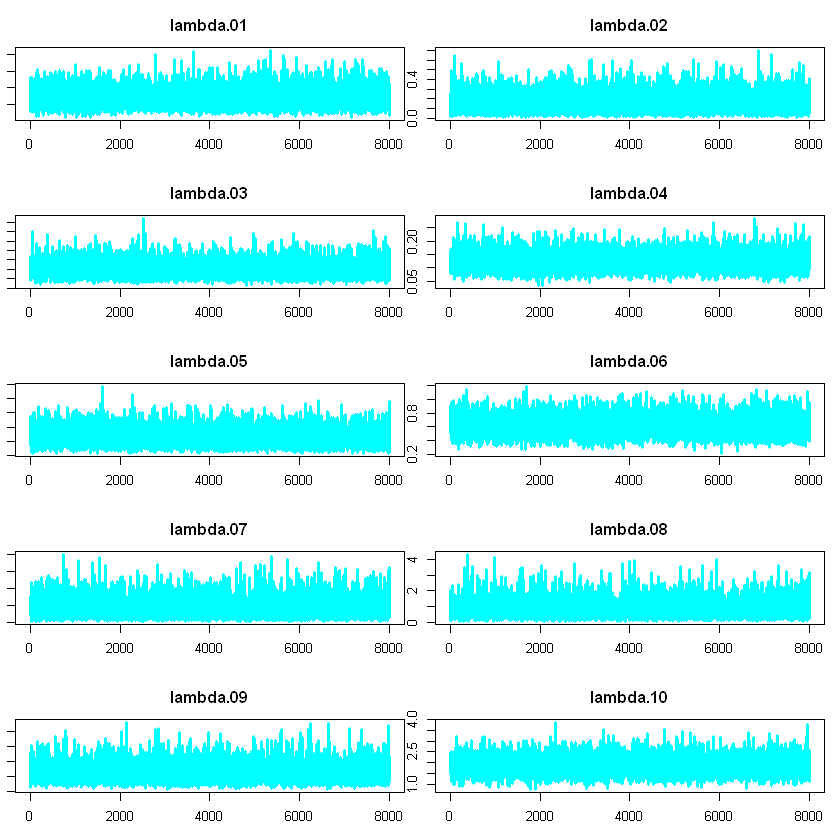

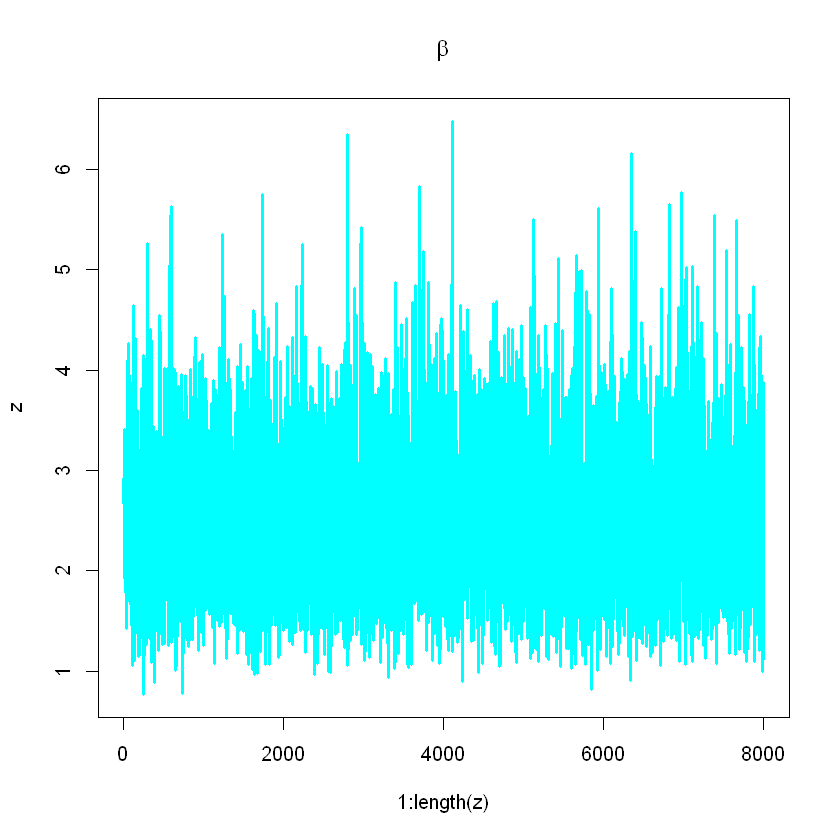

In [11]:
do.traceplot<-function(z,...){plot(1:length(z),z,type="l",lwd=2.5,col="cyan",...)}
old.par<-par(mfrow=c(5,2),mar=c(3,1,3,1))
mapply(do.traceplot,lambda.df,main=sprintf("lambda.%0.2d",1:10))
par(old.par)
do.traceplot(beta,main=expression(beta))

#### ACF

,lambda.01,lambda.02,lambda.03,lambda.04,lambda.05,lambda.06,lambda.07,lambda.08,lambda.09,lambda.10
acf,"1.0000000000, -0.0048398158, 0.0001671719, -0.0227735475, 0.0048312196, 0.0241861948, 0.0137741956, 0.0008574137, -0.0055865062, 0.0108087736, -0.0112982298, 0.0109514635, -0.0009384327, -0.0020752935, 0.0113779126, -0.0039565894, -0.0021102318, -0.0123910474, -0.0074486863, -0.0010935753, 0.0011176294, 0.0027337094, -0.0102098052, 0.0150148107, 0.0017024335, -0.0097749022, 0.0036930884, -0.0068045184, -0.0151130716, 0.0107974977, 0.0226742609, -0.0241096570, 0.0172207826, 0.0073040466, -0.0234061538, 0.0004547741, 0.0099713722, 0.0125809978, -0.0058552936, 0.0156780007","1.0000000000, -0.0061028924, 0.0005742733, -0.0092041726, -0.0039943615, -0.0074702700, 0.0278751267, -0.0034948206, -0.0010112730, 0.0102604038, -0.0003461676, 0.0006267588, -0.0020325719, 0.0157008129, 0.0124444567, 0.0145968082, -0.0019253953, -0.0002965464, 0.0092720875, -0.0027421935, -0.0055806792, -0.0019179166, -0.0016160692, 0.0166575384, -0.0090731455, -0.0171998154, 0.0055585821, -0.0031752937, -0.0091905240, 0.0138286308, -0.0048120415, 0.0047356825, 0.0078748517, 0.0029278683, -0.0200550049, -0.0017388023, -0.0089038485, -0.0036064813, 0.0023954266, 0.0011430317","1.0000000000, 0.0056343962, -0.0058643295, 0.0058810799, 0.0007888538, -0.0131784800, 0.0031073883, 0.0015558168, -0.0090091556, 0.0141494767, -0.0166293401, 0.0102654249, 0.0152520986, 0.0088879734, -0.0105976435, -0.0183490077, 0.0091687991, 0.0053109515, -0.0075987562, 0.0158411755, -0.0021648983, -0.0187872927, -0.0020551451, 0.0148844944, 0.0100084271, -0.0185763972, -0.0158559563, -0.0077466504, 0.0249706137, -0.0018534390, 0.0038846927, 0.0179264096, 0.0028319908, -0.0163305879, -0.0009556814, 0.0089564026, 0.0095874484, 0.0024753652, 0.0051197561, -0.0130578128","1.0000000000, -0.0062370176, 0.0106815994, 0.0042138732, -0.0010275398, -0.0033407595, 0.0095374564, -0.0132167739, 0.0046064158, -0.0010274520, 0.0037274509, 0.0200449885, -0.0075865749, -0.0023648942, -0.0055435230, 0.0079579206, 0.0111213351, 0.0104595215, -0.0192096860, 0.0095653634, -0.0018666871, 0.0046730314, 0.0117004133, 0.0022704859, -0.0019916451, -0.0178178723, -0.0005720286, 0.0186227793, -0.0287896931, -0.0020618498, -0.0073129993, -0.0256630566, 0.0076264221, 0.0201032778, -0.0098164785, -0.0148497654, 0.0201311923, 0.0164960561, 0.0073775853, -0.0214685920","1.0000000000, 0.0261804217, 0.0092668643, 0.0182613765, -0.0082717187, -0.0124819066, 0.0016645257, 0.0147811911, -0.0106234338, -0.0222851213, 0.0060356029, 0.0011723765, 0.0107859125, 0.0080771309, -0.0039255101, -0.0169791790, -0.0083706299, -0.0012753632, -0.0087207408, -0.0047309824, -0.0111089389, 0.0138298684, -0.0081568512, -0.0121546202, -0.0041203130, 0.0145175638, -0.0103196664, -0.0052781543, -0.0177762742, 0.0041109273, 0.0051390263, 0.0275010199, -0.0115545233, 0.0001279561, -0.0088118760, -0.0043237855, -0.0118806799, 0.0056574677, 0.0066727508, 0.0010861038","1.0000000000, -0.0016068651, -0.0079535607, 0.0070057005, 0.0058730405, -0.0215070119, 0.0161559562, 0.0042638699, -0.0186423929, 0.0175075630, 0.0096558980, -0.0089880087, 0.0006701133, -0.0039930957, 0.0072684120, 0.0186686009, 0.0168500249, 0.0046045338, 0.0067286271, -0.0004525895, -0.0065247495, 0.0032202355, 0.0157009997, -0.0003655579, -0.0069097359, 0.0218176818, 0.0031314061, 0.0049188058, -0.0433354589, 0.0094593344, -0.0060313092, -0.0002289356, -0.0021891410, -0.0006750466, -0.0057423071, -0.0024117472, -0.0086014313, -0.0073914328, 0.0156162145, 0.0192064402","1.0000000000, 0.1103848526, 0.0105295759, -0.0098302394, 0.0096141165, -0.0112825939, 0.0148112470, 0.0066147498, -0.0001836344, -0.0083340996, -0.0197703729, 0.0057428052, 0.0042000599, 0.0010192448, 0.0044396585, 0.0029309030, -0.0111931131, -0.0117470892, -0.0180600708, -0.0057999289, 0.0074782415, 0.0025267404, -0.0077602081, 0.0115704080, -0.0005369055, -0.0058902921, 0.0073030903, -0.0111337925, -0.01

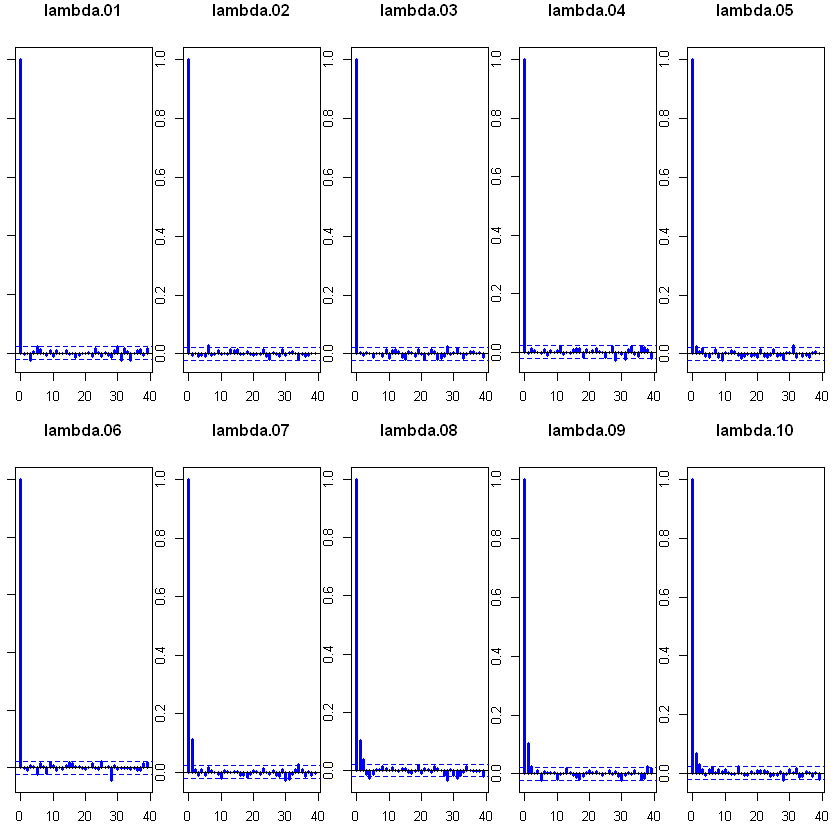

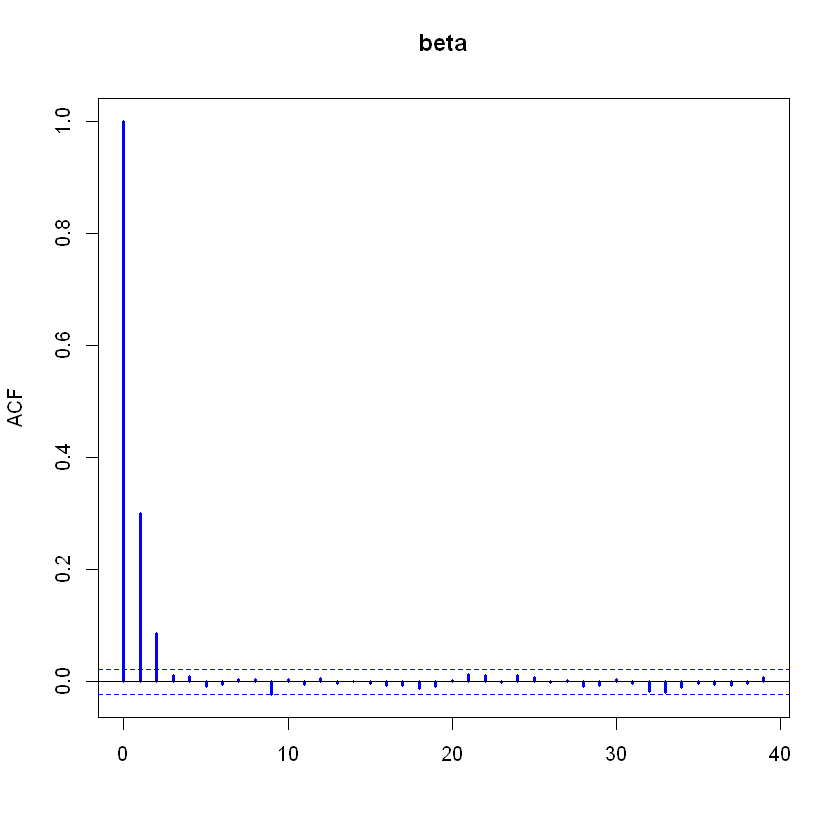

In [12]:
do.acf<-function(z,...){acf(z,lwd=2.5,col="blue",xlab="",...)}
old.par<-par(mfrow=c(2,5),mar=c(3,1,3,1))
mapply(do.acf,lambda.df,main=sprintf("lambda.%0.2d",1:10))
par(old.par)
acf(beta,lwd=2.5,col="blue",xlab="",main="beta")

#### Histograms

,lambda.01,lambda.02,lambda.03,lambda.04,lambda.05,lambda.06,lambda.07,lambda.08,lambda.09,lambda.10
breaks,"0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22","0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75","0.00, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26, 0.28, 0.30, 0.32, 0.34, 0.36, 0.38","0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29","0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5","0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00, 1.05, 1.10, 1.15, 1.20","0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2","0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4","0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8","0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9"
counts,"2, 43, 261, 601, 1032, 1171, 1243, 1079, 856, 626, 416, 262, 166, 115, 63, 33, 13, 5, 9, 2, 2, 1","707, 1850, 1994, 1408, 932, 544, 257, 179, 65, 34, 15, 11, 3, 1, 1","2, 180, 794, 1446, 1693, 1466, 1029, 651, 400, 187, 76, 46, 14, 8, 6, 2, 0, 0, 1","2, 9, 48, 128, 319, 594, 819, 987, 1065, 1022, 818, 680, 556, 348, 227, 148, 103, 44, 36, 24, 10, 5, 2, 6, 0, 1","20, 217, 586, 951, 1186, 1153, 1050, 820, 658, 458, 319, 216, 136, 98, 54, 38, 20, 13, 5, 1, 0, 1, 0, 0, 1","2, 15, 93, 256, 491, 816, 1051, 1157, 1146, 956, 767, 506, 330, 195, 98, 66, 29, 19, 6, 2","427, 1254, 1525, 1380, 1071, 776, 531, 372, 231, 156, 97, 74, 36, 30, 15, 11, 5, 5, 2, 2, 1","390, 1234, 1524, 1383, 1074, 833, 534, 374, 240, 153, 87, 57, 43, 23, 13, 14, 9, 6, 5, 2, 2, 1","2, 103, 515, 909, 1205, 1225, 1073, 928, 667, 474, 348, 194, 138, 79, 44, 32, 29, 14, 5, 6, 5, 3, 2, 1","5, 8, 34, 70, 158, 288, 422, 547, 751, 780, 859, 814, 672, 604, 555, 406, 325, 232, 159, 112, 80, 38, 37, 19, 6, 11, 2, 3, 2, 0, 1, 1"
density,"0.02499688, 0.53743282, 3.26209224, 7.51156105, 12.89838770, 14.63567054, 15.53555806, 13.48581427, 10.69866267, 7.82402200, 5.19935008, 3.27459068, 2.07474066, 1.43732033, 0.78740157, 0.41244844, 0.16247969, 0.06249219, 0.11248594, 0.02499688, 0.02499688, 0.01249844","1.767279090, 4.624421947, 4.984376953, 3.519560055, 2.329708786, 1.359830021, 0.642419698, 0.447444069, 0.162479690, 0.084989376, 0.037495313, 0.027496563, 0.007499063, 0.002499688, 0.002499688","0.012498438, 1.124859393, 4.961879765, 9.036370454, 10.579927509, 9.161354831, 6.430446194, 4.068241470, 2.499687539, 1.168603925, 0.474940632, 0.287464067, 0.087489064, 0.049993751, 0.037495313, 0.012498438, 0.000000000, 0.000000000, 0.006249219","0.02499688, 0.11248594, 0.59992501, 1.59980002, 3.98700162, 7.42407199, 10.23622047, 12.33595801, 13.31083615, 12.77340332, 10.22372203, 8.49893763, 6.94913136, 4.34945632, 2.83714536, 1.84976878, 1.28733908, 0.54993126, 0.44994376, 0.29996250, 0.12498438, 0.06249219, 0.02499688, 0.07499063, 0.00000000, 0.01249844","0.024996875, 0.271216098, 0.732408449, 1.188601425, 1.482314711, 1.441069866, 1.312335958, 1.024871891, 0.822397200, 0.572428446, 0.398700162, 0.269966254, 0.169978753, 0.122484689, 0.067491564, 0.047494063, 0.024996875, 0.016247969, 0.006249219, 0.001249844, 0.000000000, 0.001249844, 0.000000000, 0.000000000, 0.001249844","0.004999375, 0.037495313, 0.232470941, 0.639920010, 1.227346582, 2.039745032, 2.627171604, 2.892138483, 2.864641920, 2.389701287, 1.917260342, 1.264841895, 0.824896888, 0.487439070, 0.244969379, 0.164979378, 0.072490939, 0

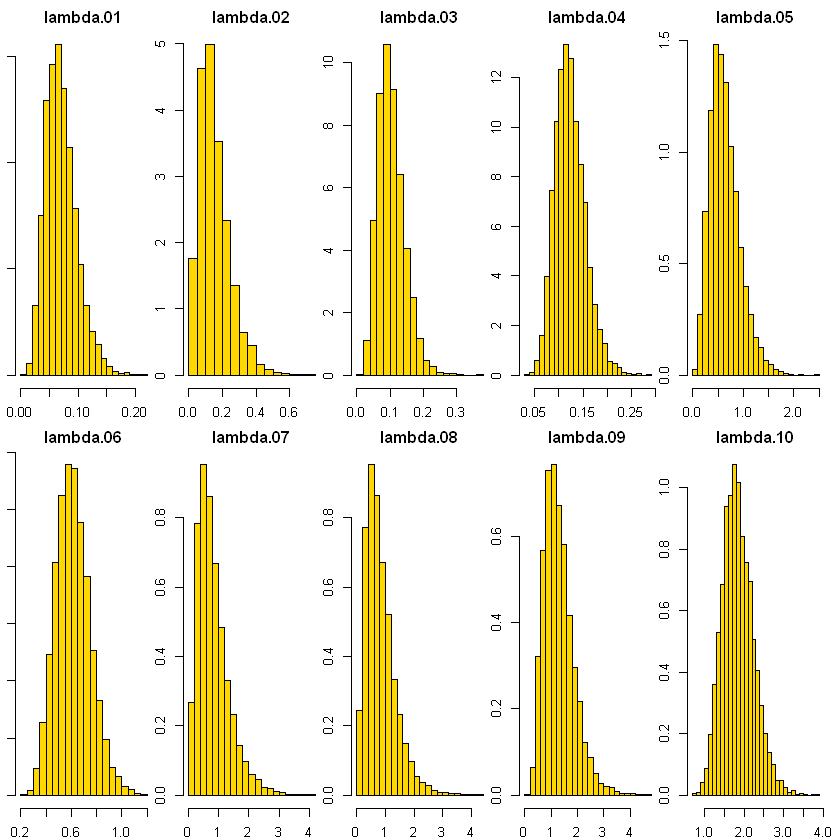

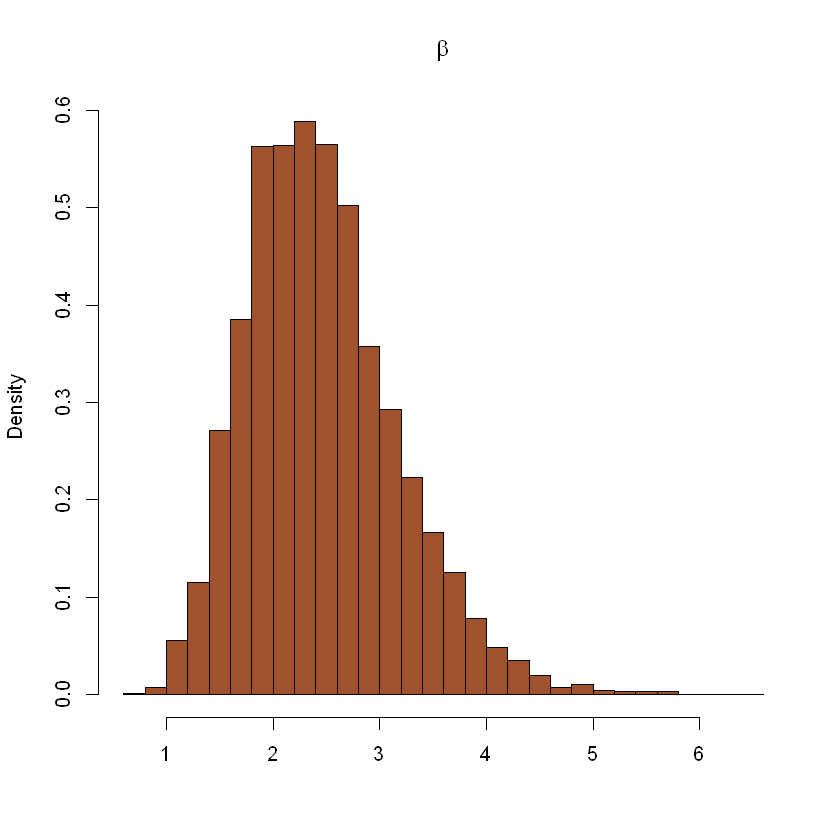

In [13]:
h1<-function(u,...){hist(u,breaks=25,col="gold",freq=FALSE,...)}
old.par<-par(mfrow=c(2,5),mar=c(2,1,2,1))
mapply(h1,lambda.df,main=sprintf("lambda.%0.2d",1:10))
par(old.par)
hist(beta,breaks=25,col="sienna",xlab="",main=expression(beta),freq=FALSE)

#### 95% posterior credible intervals

In [ ]:
# Auxiliary function
Post.Credible.Interval<-function(z,p=0.95,...){
    return(quantile(z,prob=c(0.5*(1-p),0.5*(1+p))))
    }